In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('classic')

Opening and image and converting to numpy array.

In [2]:
img = Image.open('Japan_flag.png') 
# convert to grayscale.
imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)), float) 
# Reshape according to orginal image dimensions
imgmat.shape = (imggray. size [1] , imggray. size [0])
print("Shape of image matrix(mXn) = ",imgmat.shape)

Shape of image matrix(mXn) =  (183, 275)


In [3]:
#Doing SVD
U, S, Vt = np.linalg.svd(imgmat, full_matrices = True) 
print("Shape of U(mXm) = ", U.shape)
print("Shape of S(diagonal m) = ", S.shape)
print("Shape of Vt(nXn) = ", Vt.shape)

Shape of U(mXm) =  (183, 183)
Shape of S(diagonal m) =  (183,)
Shape of Vt(nXn) =  (275, 275)


In [4]:
#Calculating the rank of image matrix
Rank = np.linalg.matrix_rank(imgmat)
print("Rank of image matrix = ",Rank)

Rank of image matrix =  45


In [5]:
#Defining Relative Error function
def RelativeError(A,Ak):
    return ((np.linalg.norm(A-Ak))/(np.linalg.norm(A)))*100

Best approximation value(K) will be : 26


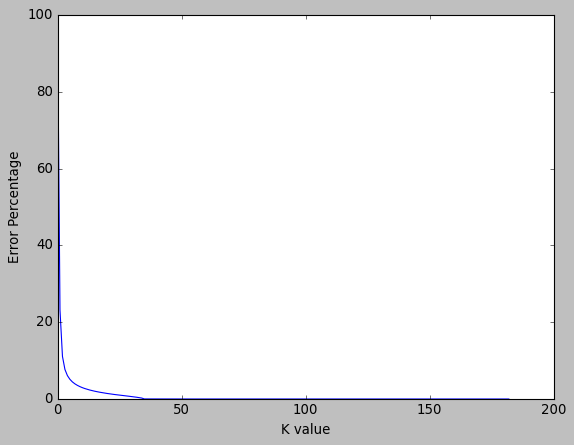

In [6]:
e = []
k = []

#Finding the best approximation k for this image matrix
#Plotting the error percentage of approximation upto rank m
for i in range(U.shape[0]):
    reconstimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    ep = RelativeError(imgmat,reconstimg)
    e.append(ep)
    #Getting k with error less than 1%
    if ep <= 1:
        k.append(i)

plt.show()
plt.plot(e)
plt.ylabel('Error Percentage')
plt.xlabel('K value')

print("Best approximation value(K) will be :",k[0])
   

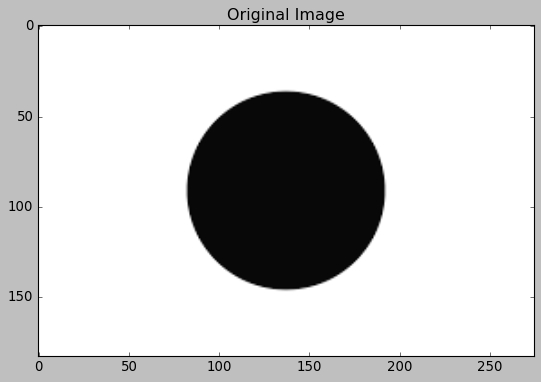

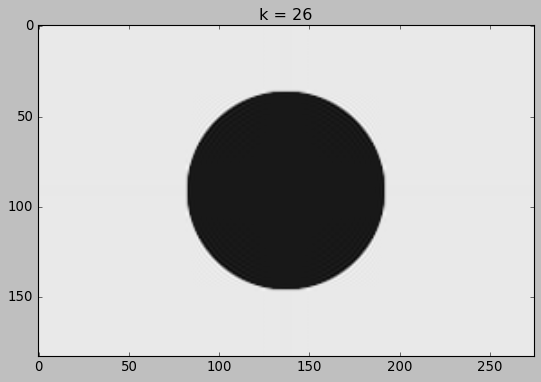

Error :  0.926642789737408 %


In [7]:
#Plotting the k approximation image and error %

rec = np.matrix(U[:, :k[0]]) * np.diag(S[:k[0]]) * np.matrix(Vt[:k[0], :])
Err = RelativeError(imgmat,rec)

#Plotting original image
plt.imshow(imgmat, cmap='gray')
title = "Original Image"
plt.title(title)
plt.show()

#plotting k approximation image
plt.imshow(rec, cmap='gray')
title1 = "k = %s" %k[0]
plt.title(title1)
plt.show()
print("Error : ", Err,"%")